# MSCA 31013 BIG DATA PLATFORMS FINAL PROJECT
### GARIMA SOHI

## MODULE - 5 (TIMELINE ANALYSIS)

#### 5.1 Importing required packages and libraries for setting up the environment

In [1]:
import os
import shutil
import pandas as pd
import numpy as np
pd.set_option('display.max_colwidth', None)
pd.reset_option('display.max_rows')
from itertools import compress 
from pyspark.sql.functions import *
from pyspark.sql.types import *
from pyspark.sql import functions as F
import seaborn as sns
import matplotlib.pyplot as plt
warnings.filterwarnings(action='ignore')

In [2]:
from google.cloud import storage

In [3]:
spark = SparkSession.builder.getOrCreate()
spark.conf.set("spark.sql.repl.eagerEval.enabled",True) 

#### 5.2 Reading the file

In [4]:
tweets_timeline = spark.read.parquet('gs://msca-bdp-students-bucket/shared_data/gsohi/bdp_final_project_eda')

In [5]:
tweets_timeline.count()

8350980

In [6]:
tweets_timeline.columns

['user_id',
 'user_name',
 'user_description',
 'user_location',
 'statuses_count',
 'user_verified_status',
 'retweet_user_id',
 'retweet_user_name',
 'retweet_user_description',
 'user_followers_count',
 'place_country',
 'tweet_created_at',
 'is_retweeted',
 'text']

In [7]:
tweets_timeline.dtypes

[('user_id', 'bigint'),
 ('user_name', 'string'),
 ('user_description', 'string'),
 ('user_location', 'string'),
 ('statuses_count', 'bigint'),
 ('user_verified_status', 'boolean'),
 ('retweet_user_id', 'bigint'),
 ('retweet_user_name', 'string'),
 ('retweet_user_description', 'string'),
 ('user_followers_count', 'bigint'),
 ('place_country', 'string'),
 ('tweet_created_at', 'string'),
 ('is_retweeted', 'string'),
 ('text', 'string')]

In [8]:
tweets_timeline.limit(3).toPandas()

,user_id,user_name,user_description,user_location,statuses_count,user_verified_status,retweet_user_id,retweet_user_name,retweet_user_description,user_followers_count,place_country,tweet_created_at,is_retweeted,text
0,1506279213145411596,Isaac fan account | STREAM DOTDOTT,compte fan de maximus | She/Her | 23 | haikyuu brainrot | not spoiler free |\nhumain tout à fait fonctionnel | pfp comms by : BetterOniphobia,None,5102,False,1110709463709679616,inkanii 🌸,Hi I draw stuff | 21 | 😷🦊 | DO NOT REPOST | pfp OK with credit,47,None,Sun Sep 25 07:54:06 +0000 2022,RT,smart MSBY Atsumu and struggling college student Kiyoomi\n#haikyuu #sakuatsu https://t.co/dx9ygFwbRL
1,1273842231082803201,달콤,None,None,7660,False,1290203557065416707,Billlie Information 🐈‍⬛,Information for Billlie Member #MoonSua #Suhyeon #Haram #Tsuki #Sheon #Siyoon #Haruna 💜🌝🌸🎀🐰🐱🐣🐢💙,76,None,Sun Sep 25 07:54:06 +0000 2022,RT,Billlie's Schedule‼️\n9/25\n▶️Inkigayo at 3.50PM\n▶️ Fansign Ktown4u Offline at 7PM &amp; Online at 9.30PM\n\n9/27\n▶️ After School Club at 1PM\n▶️ Second World EP5 at 8.50PM 🌝\n\n9/28\n▶️ 2022 Festival Jungbu University at 8.30PM\n\n#빌리 #Billlie
2,1435048419085664265,.,None,None,637,False,1559527150197555200,NewJeans Loops 👖,for #뉴진스 #NewJeans,17,None,Sun Sep 25 07:54:12 +0000 2022,RT,220924 Yonsei University \nHype Boy \n\n#뉴진스 #NewJeans https://t.co/UrZ2I6cAN6


In [5]:
tweets_timeline = tweets_timeline.select(
tweets_timeline.tweet_created_at,
tweets_timeline.user_id
)

In [6]:
tweets_timeline = tweets_timeline.toPandas()

#### 5.3 Formatting tweet_created_at column into datetime format for processing

In [7]:
tweets_timeline.tweet_created_at = pd.to_datetime(tweets_timeline.tweet_created_at, format='%a %b %d %H:%M:%S +0000 %Y')

In [8]:
tweets_timeline.tweet_created_at

0         2022-09-25 07:54:06
1         2022-09-25 07:54:06
2         2022-09-25 07:54:12
3         2022-09-25 07:54:13
4         2022-09-25 07:54:14
                  ...        
8350975   2022-05-26 15:00:56
8350976   2022-05-26 15:00:58
8350977   2022-05-26 15:00:59
8350978   2022-05-26 15:00:59
8350979   2022-05-26 15:01:01
Name: tweet_created_at, Length: 8350980, dtype: datetime64[ns]

In [9]:
print('Tweets Timeline:')
print (tweets_timeline.tweet_created_at.min())
print (tweets_timeline.tweet_created_at.max())

Tweets Timeline:
2022-04-05 04:21:38
2022-11-06 22:53:10


#### 5.4 Understanding insights through visualization

ERROR:root:Exception while sending command.
Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1207, in send_command
    raise Py4JNetworkError("Answer from Java side is empty")
py4j.protocol.Py4JNetworkError: Answer from Java side is empty

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1033, in send_command
    response = connection.send_command(command)
  File "/usr/lib/spark/python/lib/py4j-0.10.9-src.zip/py4j/java_gateway.py", line 1211, in send_command
    raise Py4JNetworkError(
py4j.protocol.Py4JNetworkError: Error while receiving


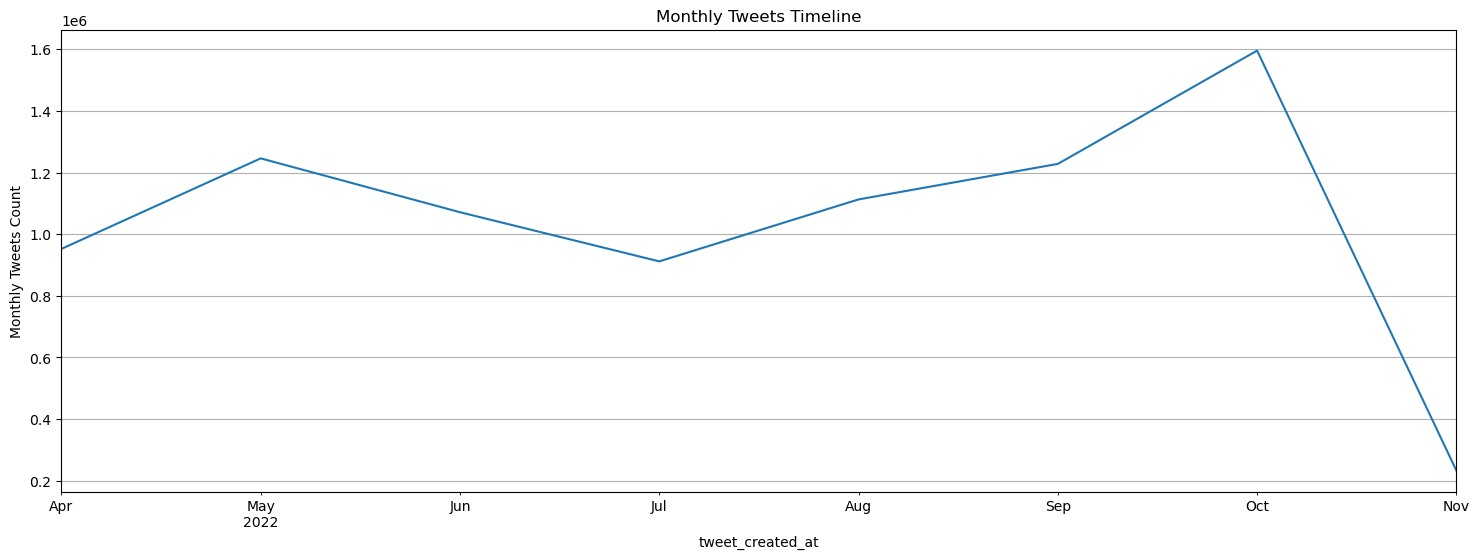

In [27]:
tweet_df_5min = tweets_timeline.groupby(pd.Grouper(key='tweet_created_at', freq='M', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('Monthly Tweets Count')
plt.title('Monthly Tweets Timeline')
plt.grid(True)

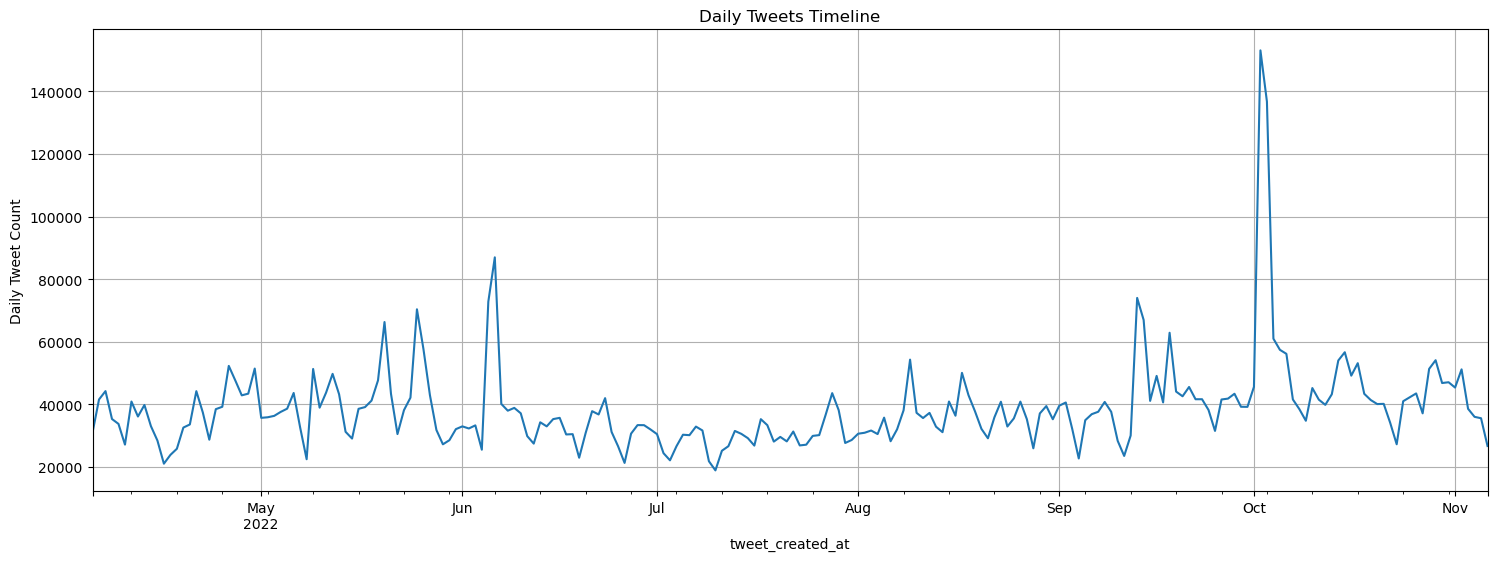

In [28]:
tweet_df_5min = tweets_timeline.groupby(pd.Grouper(key='tweet_created_at', freq='24H', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('Daily Tweet Count')
plt.title('Daily Tweets Timeline')
plt.grid(True)

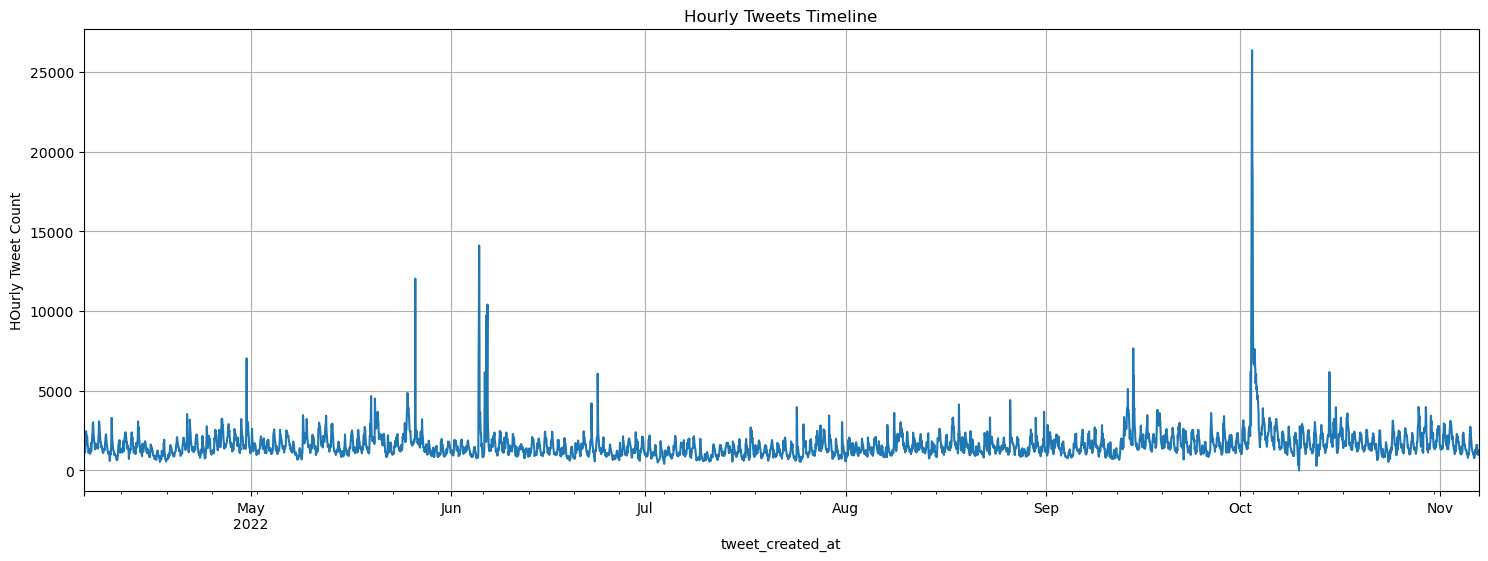

In [29]:
tweet_df_5min = tweets_timeline.groupby(pd.Grouper(key='tweet_created_at', freq='H', convention='start')).size()
tweet_df_5min.plot(figsize=(18,6))
plt.ylabel('HOurly Tweet Count')
plt.title('Hourly Tweets Timeline')
plt.grid(True)